<i>DISCLAIMER:<br>
Bellow code is only for informative purpose, i renounce any responsibility regarding this code and trained model causing loss of money during trading on real market.</i>

# Stock price prediction : NVDA

This page does following:

- load libraries and load stock data as dataframe
- display chart with close price
- add indicators to loaded dataframe
- filter out formations and get its windows
- Export data to csv file

<b>Trading strategy</b><br>
Trading chart: Daily<br>
Trade type: LONG<br>
Stock: NVDA<br>
Entry price: High price of previous week<br>
Exit price: Model predicts Highest high price of following month (4 weeks period)

<b>Trading Data</b><br>
We are loading weekly data from yahoo finance. We are preprocessing dataset in following order - 5 candle formation (representing 5 weeks) + 1 monthly candle as label (following 4 weeks period). Bellow code will preprocess data in such order, 6th candle in window is always a monthly candle.

<b>**monthly candle is not calendar month, it is 4 weeks period that is followed by our 5 candle formation</b>

Trading method is following:
- We are trading upper trend
- We are waiting for correction, when price drops bellow exponential moving averages
- We are waiting for a moment when ema6 is bellow ema12
- We are openning trade on the  previous week High price after formation is formed

<b>Traded formation</b><br>
Condition 0: <i>Last candle close is lower than EMA6</i><br>
Condition 1: <i>EMA6 is lower than EMA12</i><br>


We are getting windows from stock dataset, each window has 6 rows (6 candles), 5 rows (formation) + 1 row (label). Our above condition is using only last two candles from formation, however model will be trained on 5 candles, please refer to image bellow.

<img src='Formation_NVDA.jpg' width=600, height='500'>


___________________

<b>Import libraries</b>

In [1]:
import yfinance as yf
import talib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<b>load data</b>

In [2]:
stock = yf.download('nvda', 
                      start='1980-01-01', 
                      end='2022-06-11', 
                      interval="1wk",
                      progress=False,
)
stock.head(12)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-18,0.437500,0.488281,0.388021,0.410156,0.376630,271468800.0
1999-01-25,0.442708,0.467448,0.395833,0.395833,0.363478,156960000.0
1999-02-01,0.395833,0.416667,0.360677,0.412760,0.379021,81268800.0
1999-02-08,0.415365,0.437500,0.372396,0.434896,0.399347,63124800.0
1999-02-15,0.442708,0.460938,0.393229,0.434896,0.399347,42480000.0
1999-02-22,0.442708,0.546875,0.414063,0.457031,0.419673,127785600.0
1999-03-01,0.468750,0.479167,0.411458,0.438802,0.402934,34492800.0
1999-03-08,0.427083,0.466146,0.416667,0.424479,0.389782,59947200.0
1999-03-15,0.434896,0.450521,0.420573,0.437500,0.401739,39096000.0


<b>Display chart</b>

<AxesSubplot:xlabel='Date'>

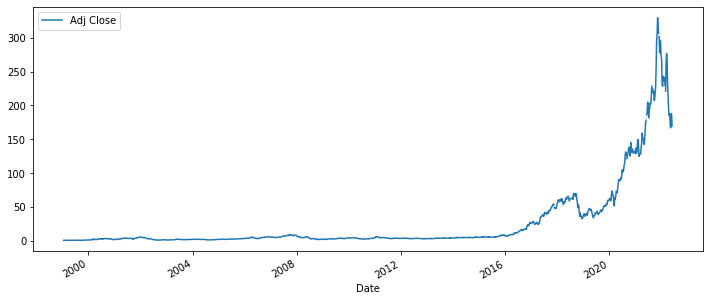

In [3]:
stock['Adj Close'].plot(legend=True,figsize=(12,5))

<b>Remove nan</b>

In [4]:
print(len(stock))
stock = stock.dropna(axis=0)
print(len(stock))

1265
1222


<b>Add indicators</b>

We are adding exponential moving average for a model to get additional data for training

In [5]:
stock['EMA6'] = talib.EMA(stock['Close'], timeperiod=6)
stock['EMA12'] = talib.EMA(stock['Close'], timeperiod=12)
stock['EMA24'] = talib.EMA(stock['Close'], timeperiod=24)
stock.head(12)

<ipython-input-5-015e04d9f556>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['EMA6'] = talib.EMA(stock['Close'], timeperiod=6)
<ipython-input-5-015e04d9f556>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['EMA12'] = talib.EMA(stock['Close'], timeperiod=12)
<ipython-input-5-015e04d9f556>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Open,High,Low,Close,Adj Close,Volume,EMA6,EMA12,EMA24
Date,,,,,,,,,
1999-01-18,0.437500,0.488281,0.388021,0.410156,0.376630,271468800.0,NaN,NaN,NaN
1999-01-25,0.442708,0.467448,0.395833,0.395833,0.363478,156960000.0,NaN,NaN,NaN
1999-02-01,0.395833,0.416667,0.360677,0.412760,0.379021,81268800.0,NaN,NaN,NaN
1999-02-08,0.415365,0.437500,0.372396,0.434896,0.399347,63124800.0,NaN,NaN,NaN
1999-02-15,0.442708,0.460938,0.393229,0.434896,0.399347,42480000.0,NaN,NaN,NaN
1999-02-22,0.442708,0.546875,0.414063,0.457031,0.419673,127785600.0,0.424262,NaN,NaN
1999-03-01,0.468750,0.479167,0.411458,0.438802,0.402934,34492800.0,0.428416,NaN,NaN
1999-03-08,0.427083,0.466146,0.416667,0.424479,0.389782,59947200.0,0.427291,NaN,NaN
1999-03-15,0.434896,0.450521,0.420573,0.437500,0.401739,39096000.0,0.430208,NaN,NaN


Remove not needed colls

In [6]:
try:
    stock = stock.drop(labels=['Adj Close','Volume'],axis=1)
except:
    pass
stock = stock.reset_index()
stock.head(6)

,Date,Open,High,Low,Close,EMA6,EMA12,EMA24
0,1999-01-18,0.437500,0.488281,0.388021,0.410156,NaN,NaN,NaN
1,1999-01-25,0.442708,0.467448,0.395833,0.395833,NaN,NaN,NaN
2,1999-02-01,0.395833,0.416667,0.360677,0.412760,NaN,NaN,NaN
3,1999-02-08,0.415365,0.437500,0.372396,0.434896,NaN,NaN,NaN
4,1999-02-15,0.442708,0.460938,0.393229,0.434896,NaN,NaN,NaN
5,1999-02-22,0.442708,0.546875,0.414063,0.457031,0.424262,NaN,NaN


In [7]:
stock['Date'] = pd.to_datetime(stock['Date'], format="%Y-%m-%d") 
stock.head(6)

,Date,Open,High,Low,Close,EMA6,EMA12,EMA24
0,1999-01-18,0.437500,0.488281,0.388021,0.410156,NaN,NaN,NaN
1,1999-01-25,0.442708,0.467448,0.395833,0.395833,NaN,NaN,NaN
2,1999-02-01,0.395833,0.416667,0.360677,0.412760,NaN,NaN,NaN
3,1999-02-08,0.415365,0.437500,0.372396,0.434896,NaN,NaN,NaN
4,1999-02-15,0.442708,0.460938,0.393229,0.434896,NaN,NaN,NaN
5,1999-02-22,0.442708,0.546875,0.414063,0.457031,0.424262,NaN,NaN


Bellow code will sort out data to windows of 6 rows

5 rows representing 5 weeks 1 row represents monthly candle max/min/open/close (that candle will be used as label in model training)

In [8]:
from datetime import datetime

#stock = stock.reset_index()
stock
#get week day
#stock.iloc[0,0].weekday()
validated = False
week_validation = 0
ndweek_validation = 0
c = 0

final_df_w = pd.DataFrame()

for row in range(len(stock)):

        if row+5+4<len(stock):      

            temp_df = pd.DataFrame()
            temp_df = stock.iloc[row:row+5,:].copy()

            validated = False
            ndweek_validation = 0

            temp_df2 = pd.DataFrame()
            temp_df2 = stock.iloc[row+5:row+5+4,:].copy()
            maxv = np.max(temp_df2.iloc[:,1:4].to_numpy())
            minv = np.min(temp_df2.iloc[:,1:4].to_numpy())
            if maxv == np.nan:
                print(temp_df2.iloc[:,1:4])
                break
            openv = temp_df2.iloc[0,1]
            closev = temp_df2.iloc[3,4]

        #     print("openv: ",openv)
        #     print("close: ",closev)
        #     print("maxv: ", maxv)
        #     print("minv: ", minv)

            dicti = {'Open':[openv],
                    'High':[maxv],
                    'Low':[minv],
                    'Close':[closev],
                    'Date':"Month"}

            temp_df3 = pd.DataFrame(dicti)
            final_df_w = pd.concat([final_df_w,temp_df],axis=0)
            final_df_w = pd.concat([final_df_w,temp_df3],axis=0)
    


print("DONE")      

DONE


In [9]:
temp_df

,Date,Open,High,Low,Close,EMA6,EMA12,EMA24
1212,2022-04-11,222.139999,227.770004,211.630005,212.580002,238.995204,245.130077,246.528697
1213,2022-04-18,212.000000,226.699997,195.000000,195.149994,226.468001,237.440834,242.418401
1214,2022-04-25,192.020004,201.279999,182.899994,185.470001,214.754287,229.445321,237.862529
1215,2022-05-02,185.410004,204.000000,179.899994,186.750000,206.753062,222.876810,233.773527
1216,2022-05-09,180.339996,182.550003,155.669998,177.059998,198.269329,215.828070,229.236444


Data check

In [10]:
final_df_w.head(12)

,Date,Open,High,Low,Close,EMA6,EMA12,EMA24
0,1999-01-18 00:00:00,0.437500,0.488281,0.388021,0.410156,NaN,NaN,NaN
1,1999-01-25 00:00:00,0.442708,0.467448,0.395833,0.395833,NaN,NaN,NaN
2,1999-02-01 00:00:00,0.395833,0.416667,0.360677,0.412760,NaN,NaN,NaN
3,1999-02-08 00:00:00,0.415365,0.437500,0.372396,0.434896,NaN,NaN,NaN
4,1999-02-15 00:00:00,0.442708,0.460938,0.393229,0.434896,NaN,NaN,NaN
0,Month,0.442708,0.546875,0.411458,0.437500,NaN,NaN,NaN
1,1999-01-25 00:00:00,0.442708,0.467448,0.395833,0.395833,NaN,NaN,NaN
2,1999-02-01 00:00:00,0.395833,0.416667,0.360677,0.412760,NaN,NaN,NaN
3,1999-02-08 00:00:00,0.415365,0.437500,0.372396,0.434896,NaN,NaN,NaN
4,1999-02-15 00:00:00,0.442708,0.460938,0.393229,0.434896,NaN,NaN,NaN


In [11]:
stock.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
EMA6      5
EMA12    11
EMA24    23
dtype: int64

In [12]:
windowed_df = final_df_w.copy()
print(len(windowed_df)/6)
#windowed_df = windowed_df.set_index('Date')
windowed_df.tail(12)

1213.0


,Date,Open,High,Low,Close,EMA6,EMA12,EMA24
1211,2022-04-04 00:00:00,267.279999,275.579987,230.619995,231.190002,249.561285,251.048273,249.480758
1212,2022-04-11 00:00:00,222.139999,227.770004,211.630005,212.580002,238.995204,245.130077,246.528697
1213,2022-04-18 00:00:00,212.000000,226.699997,195.000000,195.149994,226.468001,237.440834,242.418401
1214,2022-04-25 00:00:00,192.020004,201.279999,182.899994,185.470001,214.754287,229.445321,237.862529
1215,2022-05-02 00:00:00,185.410004,204.000000,179.899994,186.750000,206.753062,222.876810,233.773527
0,Month,180.339996,196.190002,155.669998,187.199997,NaN,NaN,NaN
1212,2022-04-11 00:00:00,222.139999,227.770004,211.630005,212.580002,238.995204,245.130077,246.528697
1213,2022-04-18 00:00:00,212.000000,226.699997,195.000000,195.149994,226.468001,237.440834,242.418401
1214,2022-04-25 00:00:00,192.020004,201.279999,182.899994,185.470001,214.754287,229.445321,237.862529
1215,2022-05-02 00:00:00,185.410004,204.000000,179.899994,186.750000,206.753062,222.876810,233.773527


Bellow code will select only windows with 5 rows each, that represents formation that is intended to trade. If conditions, representing the formation are True, window is appended to new dataframe train_df. That df is exported as csv file.

In [13]:
temp_df = pd.DataFrame()
final_df = pd.DataFrame()

trades = 0
counter = 0
for row in range(5,len(windowed_df)):
    if windowed_df.iloc[row,0] == "Month":

        #maxv = np.max(windowed_df.iloc[row-5:row,1:5].to_numpy())
        #print(windowed_df.iloc[row-5:row,1:5])
        #print(maxv)

        #Debugging block
#         print("Last Close: ",windowed_df.iloc[row-1,4])
#         print("First Open: ",windowed_df.iloc[row-5,1])
#         print("Last Open: ",windowed_df.iloc[row-1,1])
#         print("Last EMA 6: ",windowed_df.iloc[row-1,5])
#         print("Last High: ",windowed_df.iloc[row-1,2])
#         print("Weekly high: ",windowed_df.iloc[row,2])
#         temp_df = windowed_df.iloc[row-5:row+1,:]
#         break

        #Trading Condition
        if ((#Last close is lower than EMA6
            windowed_df.iloc[row-1,4] < windowed_df.iloc[row-1,5]) 
            #Last EMA6 is lower than EMA12
            and (windowed_df.iloc[row-1,5] < windowed_df.iloc[row-1,6]) 
            ): 
                      
            #Validation
            if counter == 0:
                
                counter += 1
                print("Last Close: ",windowed_df.iloc[row-1,4])
                print("Last Open: ",windowed_df.iloc[row-1,1])
                print("Last High: ",windowed_df.iloc[row-1,2])
                print("First Open: ",windowed_df.iloc[row-5,1])
                print("Following Week high: ",windowed_df.iloc[row,2])
                print("Last EMA 6: ",windowed_df.iloc[row-1,5])
                print("Last EMA 12: ",windowed_df.iloc[row-1,6])
                
            temp_df = windowed_df.iloc[row-5:row+1,:]           
            
            trades += 1
                        
            temp_df = windowed_df.iloc[row-5:row+1,:]

            temp_df['trades'] = int(trades)

            final_df = pd.concat([final_df,temp_df],axis=0)
             
#debugging
#temp_df.tail(7)
temp_df.tail(7)

Last Close:  0.359375
Last Open:  0.41927099227905273
Last High:  0.41927099227905273
First Open:  0.4466150104999542
Following Week high:  0.4453130066394806
Last EMA 6:  0.40785820873653145
Last EMA 12:  0.41629232982030284


<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = int(trades)
<ipython-input-13-788c1f02a3f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,Date,Open,High,Low,Close,EMA6,EMA12,EMA24,trades
1212,2022-04-11 00:00:00,222.139999,227.770004,211.630005,212.580002,238.995204,245.130077,246.528697,301
1213,2022-04-18 00:00:00,212.000000,226.699997,195.000000,195.149994,226.468001,237.440834,242.418401,301
1214,2022-04-25 00:00:00,192.020004,201.279999,182.899994,185.470001,214.754287,229.445321,237.862529,301
1215,2022-05-02 00:00:00,185.410004,204.000000,179.899994,186.750000,206.753062,222.876810,233.773527,301
1216,2022-05-09 00:00:00,180.339996,182.550003,155.669998,177.059998,198.269329,215.828070,229.236444,301
0,Month,175.089996,196.190002,157.550003,169.740005,NaN,NaN,NaN,301


In [14]:
final_df = final_df.set_index('Date')
final_df.tail()

,Open,High,Low,Close,EMA6,EMA12,EMA24,trades
Date,,,,,,,,
2022-04-18 00:00:00,212.000000,226.699997,195.000000,195.149994,226.468001,237.440834,242.418401,301
2022-04-25 00:00:00,192.020004,201.279999,182.899994,185.470001,214.754287,229.445321,237.862529,301
2022-05-02 00:00:00,185.410004,204.000000,179.899994,186.750000,206.753062,222.876810,233.773527,301
2022-05-09 00:00:00,180.339996,182.550003,155.669998,177.059998,198.269329,215.828070,229.236444,301
Month,175.089996,196.190002,157.550003,169.740005,NaN,NaN,NaN,301


<b>Save final data in csv format</b>

This csv file is used by following list to trade our model

In [15]:
print("final_df shape: ",final_df.shape)
final_df.to_csv('nvda_stock_raw.csv')

final_df shape:  (1806, 8)


<b>Save raw stock data in csv format</b>

This is done only for validation purpose of final trades

In [16]:
print("final_df shape: ",stock.shape)
stock.to_csv('nvda_stock_raw_initial_df.csv')

final_df shape:  (1222, 8)
